<a href="https://colab.research.google.com/github/1kr1st1na1/CW_3year/blob/main/CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title ПОДКЛЮЧЕНИЕ К GDRIVE И GSHEET
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.getcwd())
print(os.listdir('./'))
print(os.listdir('/content/drive'))
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/CW3y'))
from google.auth import default
creds, _ = default()
gs = gspread.authorize(creds)


import time
print('\nРаботаем с таблицей')
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/CW3y/
os.stat('/content/drive/MyDrive/Colab Notebooks/CW3y/CW_SH.gsheet')
table = gs.open_by_key('1bsDTq-rsJxms25tELEUff5pIiwUUjy4GvK44469lS5g')
print(dir(table))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2
Mounted at /content/drive
/content
['.config', 'drive', 'sample_data']
['.file-revisions-by-id', 'MyDrive', '.shortcut-targets-by-id', '.Trash-0']
['Copy of CW_SH (2).gsheet', 'Copy of CW_SH (1).gsheet', 'new copy 150223.gsheet', 'Copy of CW_SH.gsheet', 'CW_SH.gsheet']

Работаем с таблицей
total 3
-rw------- 1 root 172 Feb  8 15:18 'Copy of CW_SH (1).gsheet'
-rw------- 1 root 172 Feb  7 14:06 'Copy of CW_SH (2).gsheet'
-rw------- 1 root 172 Feb 15 08:04 'Copy of CW_SH.gsheet'
-rw------- 1 root 172 Apr  9 17:19  CW_SH.gsheet
-rw------- 1 root 172 Feb 15 07:51 'new copy 150223.gsheet'
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '_

In [ ]:
#@title
# #@title CREATING A SPREADSHEET
# new_spreadsheet = "new" #@param {type: "string"}
# sh = gc.create(new_spreadsheet)
# print('\nРаботаем с таблицей')
# %ll -lAF /content/drive/MyDrive/"Colab Notebooks"/CW3y/
# os.stat('/content/drive/MyDrive/Colab Notebooks/SWOT1/TABLE.gsheet')
# table = gs.open_by_key('1LSWFOVthquRnsqGwxX7eNQCzqY_j1fKd7fq8KUlQczo')
# print(dir(table))

In [2]:
#@title GETTING TEMPLATE SHEET 
worksheet = table.get_worksheet(0)

In [3]:
#@title CREATING A NEW WORKSHEET (FROM A TEMPLATE)
new_WS_name = "\u043D\u043E\u0432\u0430\u044F \u0437\u0430\u0434\u0430\u0447\u0430 12 \u0430\u043F\u0440" #@param {type: "string"}
index_to_put_the_sheet = "2" #@param [1,2,3,4,5,6,7,8,9,10]
table.get_worksheet(0).duplicate(index_to_put_the_sheet, None, new_WS_name)
#worksheet = table.add_worksheet(title=new_WS, rows=200, cols=15)
worksheet = table.get_worksheet(int(index_to_put_the_sheet))

In [4]:
#@title ASKING HOW MANY PARAMETERS + POWER (OF EACH)
#print("How many parameters do you want to consider?")
num_param =int(input("Укажите количество критериев для решения задачи МАИ: ")) 
#param_names= []
col_name = 3 
for n in range(0,num_param): 
  param_name = input("Название нового критерия: ")
  param_value = input("Важность нового критерия(0-10): ")
  worksheet.update_cell(2,col_name, param_name)
  worksheet.update_cell(3,col_name, param_value)
  col_name += 3
 # param_names.append(a)



#print("\n",inputed_num_param,"\n")
#print("\n",param_names,"\n")

Укажите количество критериев для решения задачи МАИ: 4
Название нового критерия: опыт
Важность нового критерия(0-10): 5
Название нового критерия: образование
Важность нового критерия(0-10): 4
Название нового критерия: доп знания
Важность нового критерия(0-10): 7
Название нового критерия: интервью
Важность нового критерия(0-10): 9


In [5]:

# Output in high quality.
%config InlineBackend.figure_format='retina'


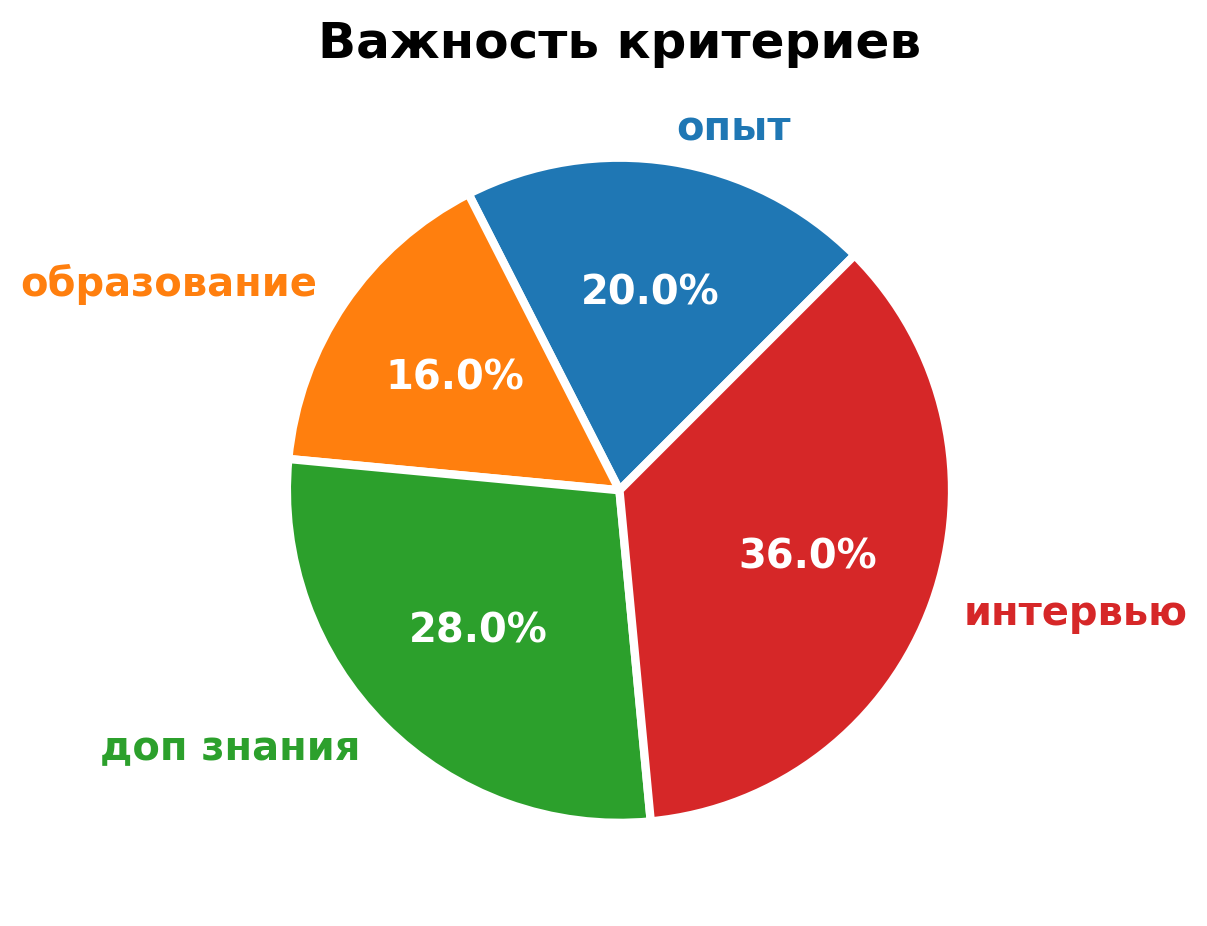

In [29]:
#@title PIE Важность критериев
import matplotlib.pyplot as plt
cr_pie = []
st_col = 3
for i in range(num_param):
  cr_pie.append(float(worksheet.cell(4, st_col).value) * 100)
  st_col += 3
labels = []
lab_col = 3
for l in range(num_param):
  labels.append(worksheet.cell(2, lab_col).value)
  lab_col += 3

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    cr_pie, labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=45)
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Важность критериев', fontsize=18, fontweight='bold')
plt.tight_layout()

In [30]:
#@title ASKING HOW MANY OPTIONS + ABILITY (IN EACH PARAM)

num_opt =int(input("Укажите количество альтернатив для решения задачи МАИ: ")) 

row_opt = 6

for n in range(0,num_opt): 
  col_ab = 3
  print("--------------------------------------------------------")
  opt_name = input("Название новой альтернативы ")
  worksheet.update_cell(row_opt,1, opt_name)
  for p in range(num_param):
    print("Владение",worksheet.cell(2,col_ab ).value , " критерием: ")
    ab_value = input()
    worksheet.update_cell(row_opt,col_ab, ab_value)
    col_ab += 3
  row_opt += 1
 # param_names.append(a)



#print("\n",inputed_num_param,"\n")
#print("\n",param_names,"\n")

Укажите количество альтернатив для решения задачи МАИ: 5
--------------------------------------------------------
Название новой альтернативы ф1
Владение опыт  критерием: 
6
Владение образование  критерием: 
2
Владение доп знания  критерием: 
9
Владение интервью  критерием: 
4
--------------------------------------------------------
Название новой альтернативы ф2
Владение опыт  критерием: 
2
Владение образование  критерием: 
9
Владение доп знания  критерием: 
10
Владение интервью  критерием: 
9
Название новой альтернативы ф3
--------------------------------------------------------
Владение опыт  критерием: 
4
Владение образование  критерием: 
4
Владение доп знания  критерием: 
1
Владение интервью  критерием: 
3
--------------------------------------------------------
Название новой альтернативы ф4
Владение опыт  критерием: 
10
Владение образование  критерием: 
6
Владение доп знания  критерием: 
9
Владение интервью  критерием: 
8
--------------------------------------------------------


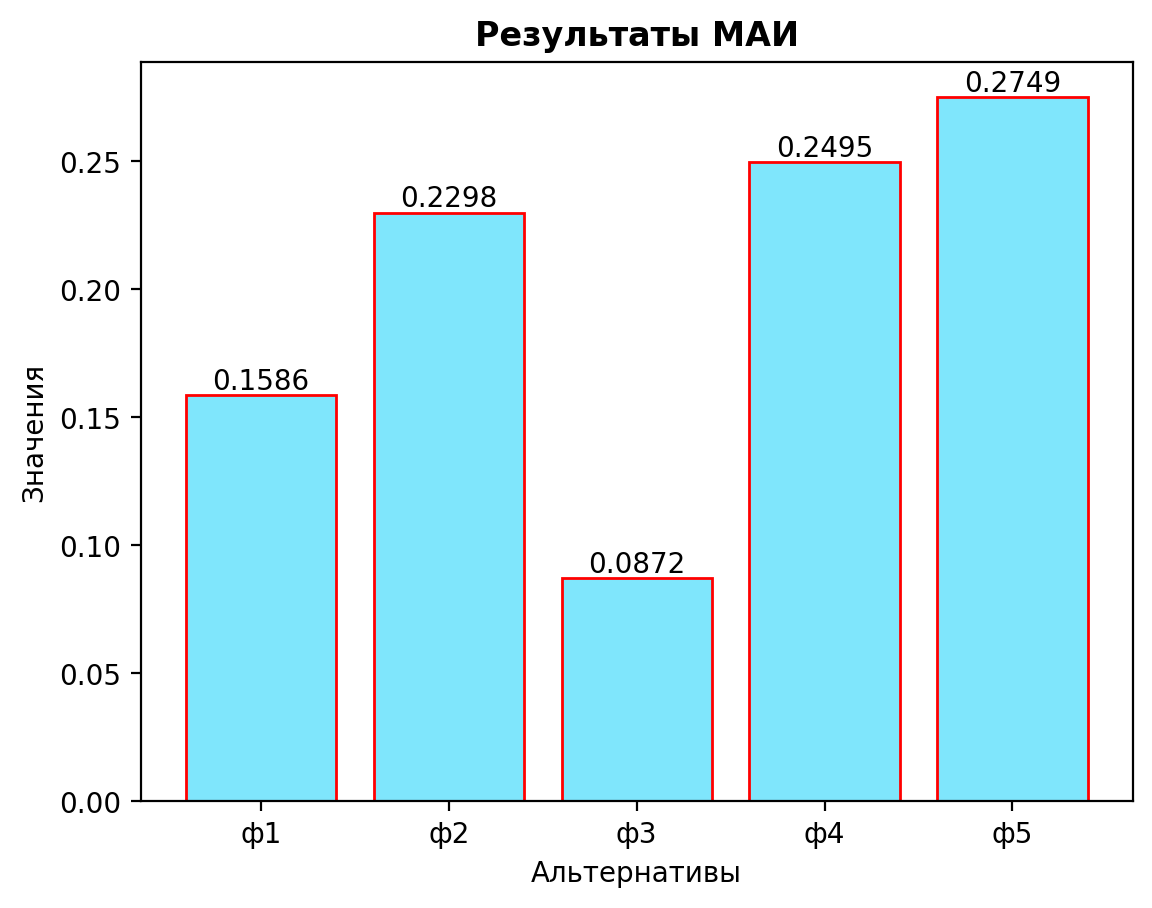

In [53]:
#@title РЕЗУЛЬТАТЫ СТОЛБЧАТАЯ ДИАГРАММА 
import matplotlib.pyplot as plt
alt_arr = []
st_row = 6
for i in range(num_opt):
  alt_arr.append(worksheet.cell(st_row, 1).value)
  st_row += 1

alt_res = []
res_row = 6
for l in range(num_opt):
  alt_res.append(round(float(worksheet.cell(res_row, 2).value),4))
  res_row += 1


plt.bar(alt_arr, alt_res, color=(0.49, 0.9, 0.99, 0.99), edgecolor='red')

plt.title("Результаты МАИ",fontweight='bold' )
plt.xlabel("Альтернативы")
plt.ylabel("Значения")



for k in range(len(alt_res)):
    plt.annotate(str(alt_res[k]), xy=(alt_arr[k],alt_res[k]), ha='center', va='bottom')

plt.show()

In [ ]:
#@title etc.
#%tensorboard --logdir logs